In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import log
import numpy as np

In [2]:
scanner_data = pd.read_csv('scanner_data.csv')

In [3]:
scanner_data.shape

(131706, 8)

In [4]:
scanner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [5]:
scanner_data.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [6]:
scanner_data.columns

Index(['Unnamed: 0', 'Date', 'Customer_ID', 'Transaction_ID', 'SKU_Category',
       'SKU', 'Quantity', 'Sales_Amount'],
      dtype='object')

# Changing "Unnamed:0" column to "Row_ID".

In [7]:
scanner_data = scanner_data.rename(columns={'Unnamed: 0':'Row_ID'})

In [8]:
scanner_data.head()

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [9]:
scanner_data.dtypes

Row_ID              int64
Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

In [10]:
scanner_data.isnull().sum().sum()

0

# Just for further verification, I am checking for any mising values in each column of scanner_data, as well as, the percentages and ordering them in increasing order. Then using `pd.concat` to present them in a single table with the helpful column names 'count' and '%'.

In [11]:
missing = pd.concat([scanner_data.isnull().sum(axis=1), 100 * scanner_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count', ascending = True)

,count,%
0,0,0.0
87811,0,0.0
87810,0,0.0
87809,0,0.0
87808,0,0.0
...,...,...
43895,0,0.0
43894,0,0.0
43893,0,0.0
43859,0,0.0


In [12]:
duplicates = scanner_data.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
131701    False
131702    False
131703    False
131704    False
131705    False
Length: 131706, dtype: bool


# Checking for the top product categories sold.

In [13]:
scanner_data['SKU_Category'].value_counts().head()

N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
Name: SKU_Category, dtype: int64

# Checking for the top products sold.

In [14]:
scanner_data['SKU'].value_counts().head()

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
Name: SKU, dtype: int64

# Checking for the top patronizing customers.

In [15]:
scanner_data['Customer_ID'].value_counts().head()

1660     228
1665     222
17104    218
1685     191
16905    179
Name: Customer_ID, dtype: int64

In [16]:
scanner_data['Transaction_ID'].value_counts().head()

19098    21
1348     21
42295    20
34320    19
39032    19
Name: Transaction_ID, dtype: int64

# Calculating the mean of quantity and sales amount

In [18]:
product_price_means = scanner_data.groupby('SKU')[['Quantity', 'Sales_Amount']].mean()
product_price_means.head()

,Quantity,Sales_Amount
SKU,,
00GVC,1.000000,17.680000
00OK1,1.200000,1.527333
0121I,1.107143,2.240714
01IEO,1.131579,7.052632
01IQT,1.000000,1.317143


# Checking the product of interest

In [19]:
scanner_data[scanner_data.SKU == 'UNJKW']

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
11,12,2017-01-02,7548,10,N8U,UNJKW,1.0,2.11
42,43,2017-01-02,3071,26,N8U,UNJKW,2.0,4.23
110,111,2017-01-02,7488,65,N8U,UNJKW,1.0,2.11
166,167,2017-01-02,6523,96,N8U,UNJKW,1.0,2.11
252,253,2017-01-03,6806,148,N8U,UNJKW,2.0,4.23
...,...,...,...,...,...,...,...,...
131258,131259,2017-07-03,2752,32691,N8U,UNJKW,1.0,2.11
131333,131334,2017-07-04,15739,32720,N8U,UNJKW,1.0,2.11
131508,131509,2017-07-05,10772,32802,N8U,UNJKW,1.0,2.11
131533,131534,2017-07-05,10771,32809,N8U,UNJKW,1.0,2.11


In [20]:
scanner_data[scanner_data.SKU == 'UNJKW'].T

,11,42,110,166,252,291,295,342,448,502,...,130778,130914,131067,131123,131192,131258,131333,131508,131533,131544
Row_ID,12,43,111,167,253,292,296,343,449,503,...,130779,130915,131068,131124,131193,131259,131334,131509,131534,131545
Date,2017-01-02,2017-01-02,2017-01-02,2017-01-02,2017-01-03,2017-01-03,2017-01-03,2017-01-03,2017-01-04,2017-01-04,...,2017-07-02,2017-07-02,2017-08-02,2017-07-03,2017-07-03,2017-07-03,2017-07-04,2017-07-05,2017-07-05,2017-07-05
Customer_ID,7548,3071,7488,6523,6806,8308,7077,1862,1685,1643,...,16062,5733,17618,3404,22016,2752,15739,10772,10771,6391
Transaction_ID,10,26,65,96,148,169,172,201,246,270,...,32483,32536,37206,32626,32657,32691,32720,32802,32809,32818
SKU_Category,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U,...,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U,N8U
SKU,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,...,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW,UNJKW
Quantity,1,2,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Sales_Amount,2.11,4.23,2.11,2.11,4.23,2.11,2.11,2.11,1.62,2.11,...,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11,2.11


In [21]:
scanner_data['Sales_Amount'].sum()

1578038.6199999999

In [22]:
category_price_means = scanner_data.groupby('SKU_Category')[['Sales_Amount']].mean()
category_price_means.head()

,Sales_Amount
SKU_Category,
01F,17.622739
06Z,41.240048
0H2,6.638920
0KX,4.444457
0WT,6.021530


In [23]:
unit_price_means = scanner_data.groupby('SKU')[['Sales_Amount']].mean()
unit_price_means.head()

,Sales_Amount
SKU,
00GVC,17.680000
00OK1,1.527333
0121I,2.240714
01IEO,7.052632
01IQT,1.317143


In [24]:
unit_price_means = scanner_data.groupby('SKU')[['Sales_Amount']].count()
unit_price_means.head()

,Sales_Amount
SKU,
00GVC,2
00OK1,15
0121I,28
01IEO,38
01IQT,7


In [25]:
scanner_data.describe()

,Row_ID,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


# Checking for relationship between sales amount and quantity

<AxesSubplot:xlabel='Sales_Amount', ylabel='Quantity'>

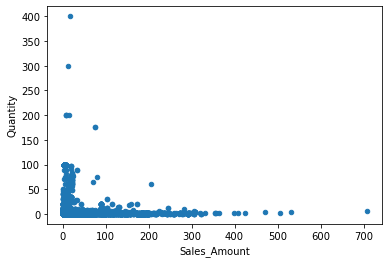

In [26]:
scanner_data.plot(x='Sales_Amount', y='Quantity', kind='scatter')

In [27]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.981524
std          19.359699
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         707.730000
Name: Sales_Amount, dtype: float64

In [28]:
scanner_data['Quantity'].describe()

count    131706.000000
mean          1.485311
std           3.872667
min           0.010000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: Quantity, dtype: float64

# Detecting Outliers

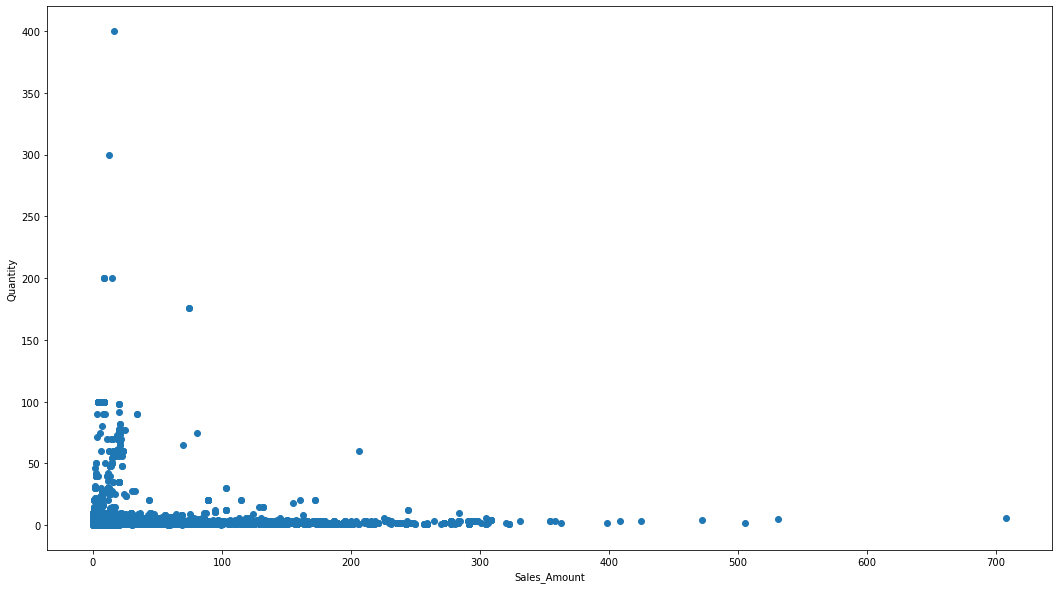

In [29]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(scanner_data['Sales_Amount'], scanner_data['Quantity'])
ax.set_xlabel('Sales_Amount')
ax.set_ylabel('Quantity')
plt.show()

# Checking for the position of the outliers


In [30]:
print(np.where(scanner_data['Sales_Amount']>600))

(array([104910]),)


In [31]:
print(np.where(scanner_data['Quantity']>250))

(array([ 77676, 112719]),)


# Replacing outliers with the median value for Sales_Amount

In [32]:
median = scanner_data.loc[scanner_data['Sales_Amount']<600, 'Sales_Amount'].median()
scanner_data['Sales_Amount'] = np.where(scanner_data['Sales_Amount'] >600, median,scanner_data['Sales_Amount'])

In [33]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.976203
std          19.264546
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         531.270000
Name: Sales_Amount, dtype: float64

# Replacing outliers with the median value for Quantity

In [34]:
median = scanner_data.loc[scanner_data['Quantity']<250, 'Quantity'].median()
scanner_data['Quantity'] = np.where(scanner_data['Quantity'] >250, median,scanner_data['Quantity'])

In [35]:
scanner_data['Quantity'].describe()

count    131706.000000
mean          1.480012
std           3.621478
min           0.010000
25%           1.000000
50%           1.000000
75%           1.000000
max         200.000000
Name: Quantity, dtype: float64

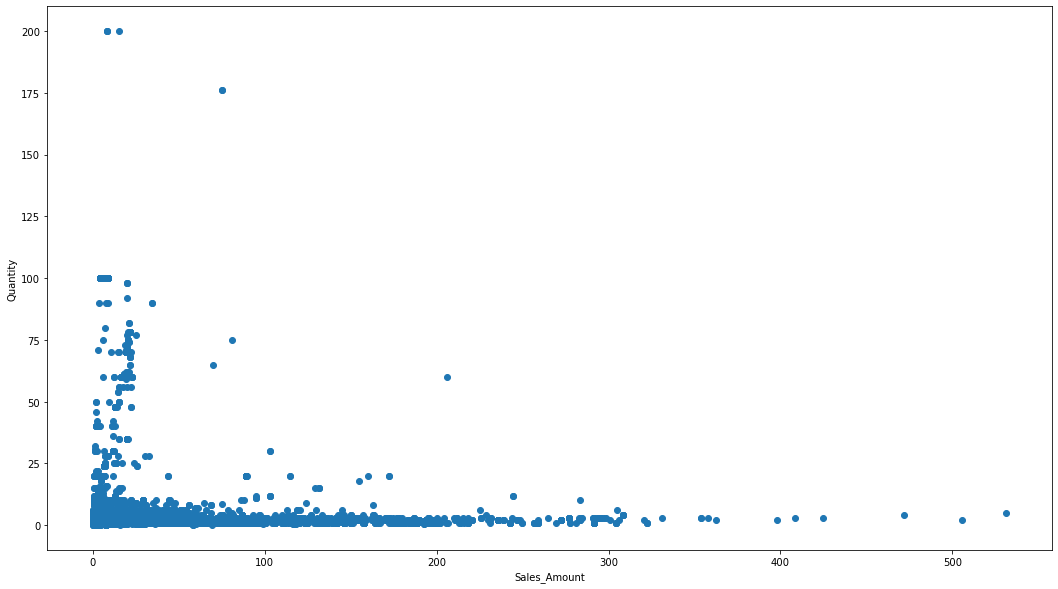

In [36]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(scanner_data['Sales_Amount'], scanner_data['Quantity'])
ax.set_xlabel('Sales_Amount')
ax.set_ylabel('Quantity')
plt.show()

# Taking the logarithm of sales amount

In [37]:
b = np.log(scanner_data['Sales_Amount'])

In [38]:
b

0         1.141033
1         1.697449
2         1.848455
3         1.720979
4         1.928619
            ...   
131701    1.865629
131702    1.504077
131703    1.646734
131704    1.519513
131705    2.615935
Name: Sales_Amount, Length: 131706, dtype: float64

In [39]:
b.describe()

count    131706.000000
mean          1.997502
std           0.923559
min          -3.912023
25%           1.442202
50%           1.934416
75%           2.512035
max           6.275270
Name: Sales_Amount, dtype: float64

# Taking the logarithm of quantity sold

In [40]:
c = np.log(scanner_data['Quantity'])

In [41]:
c

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
131701    1.098612
131702    0.000000
131703    0.000000
131704    0.000000
131705    0.000000
Name: Quantity, Length: 131706, dtype: float64

In [42]:
c.describe()

count    131706.000000
mean          0.190084
std           0.430120
min          -4.605170
25%           0.000000
50%           0.000000
75%           0.000000
max           5.298317
Name: Quantity, dtype: float64

Text(0, 0.5, 'Quantity')

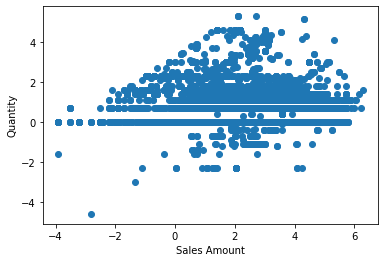

In [43]:
b = np.log(scanner_data['Quantity'])
plt.scatter(np.log(scanner_data['Sales_Amount'].apply(lambda x: float(x))), b)
plt.xlabel('Sales Amount')
plt.ylabel('Quantity')

In [44]:
!pip install pandas-profiling==2.8.0
import pandas_profiling as pp
scanner_data.profile_report()

In [45]:
scanner_data['Sales_Amount'].describe()

count    131706.000000
mean         11.976203
std          19.264546
min           0.020000
25%           4.230000
50%           6.920000
75%          12.330000
max         531.270000
Name: Sales_Amount, dtype: float64

<AxesSubplot:xlabel='Sales_Amount', ylabel='Quantity'>

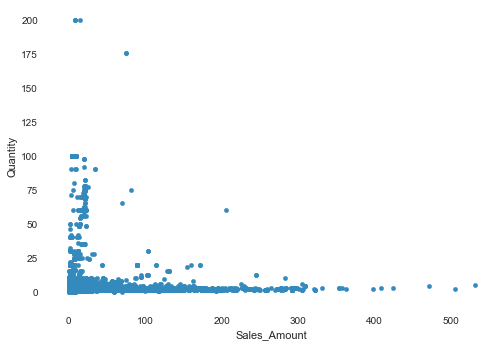

In [46]:
scanner_data.plot(x='Sales_Amount', y='Quantity', kind='scatter')

# Checking for sales summary by date

In [51]:
scanner_data.groupby('Date')['Sales_Amount'].sum()

Date
2017-01-02    1929.55
2017-01-03     798.15
2017-01-04    3273.27
2017-01-05    4919.03
2017-01-06    1559.72
               ...   
2017-12-28    3720.79
2017-12-29    3363.16
2017-12-30    3940.49
2017-12-31    4045.15
2018-01-01    1713.20
Name: Sales_Amount, Length: 363, dtype: float64

<AxesSubplot:xlabel='Date'>

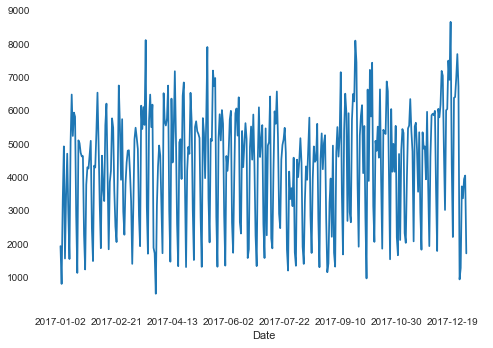

In [49]:
scanner_data.groupby('Date')['Sales_Amount'].sum().plot()

# Checking for sales summary by category

In [53]:
scanner_data.groupby('SKU_Category')['Sales_Amount'].sum()

SKU_Category
01F    38029.87
06Z     8619.17
0H2    29875.14
0KX     2044.45
0WT     4052.49
         ...   
Z4O     4925.06
Z99     1969.85
ZJG      754.01
ZX5      954.63
ZYU     1749.91
Name: Sales_Amount, Length: 187, dtype: float64

<AxesSubplot:xlabel='SKU_Category'>

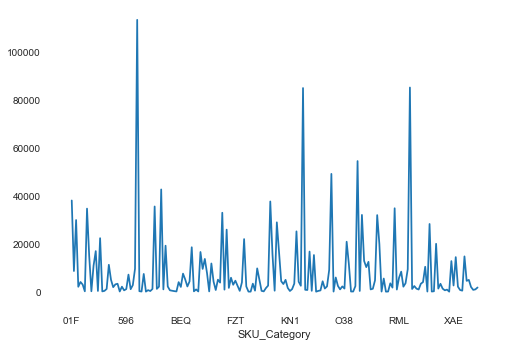

In [54]:
scanner_data.groupby('SKU_Category')['Sales_Amount'].sum().plot()

# Method Summary

I began by importing the necessary packages. I changed the "Unnamed:0" column to "Row_Id", then I checked to see if there are any missing values and what percentages of the columns are missing. If there are missing values, I wanted to order them in increasing order and then present them in a single table.
Fortunately, there are no missing values in the data.
I checked for the product categories with the highest sale, as well as, the products with the highest sale and the highest patronizing customers. The top five categories with the highest sales are N8U, R6E, LPF, P42, U5F with 10913, 5099, 5062, 4836 and 4570 sales respectively. The top five products sold are UNJKW, COWU2, OV1P9, M6J9W, C6TXL with 2007, 791, 737, 698 and 689 sales respectively. The top five patronizing customers are customers with IDs: 1660, 1665, 17104, 1685 and 16905 with 228, 222, 218, 191 and 179 patronages respectively. I calculated the mean of quantity sold and sales price. Then I used a scatter plot to check the relationship between sales amount and quantity. I went ahead to take the logarithms of quantity sold and sales amount before carrying out data profiling to get comprehensive information about the dataset and check for further defects. Also, I checked for sales summaries by date and category.
There are three outliers in the dataset and they were replaced by the median values of their respective columns.